# 전통주점 CSV 생성 + 주소에서 지역 별로 데이터 추출하기

In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
dataCombine

,name,address,time,phone,menu,name,address,time,phone,menu
0,막걸리전당,서울 관악구 봉천로 461-1 1층,매일 16:00 ~ 01:00,0507-1407-7103,"전당모둠전, 옛날모둠전, 국산전두부와볶음김치, 한통다골뱅이무침, 한돈육전, 홍어를무...",화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,한식술집 돌,서울 성북구 보문로34길 87 1층,매일 17:00-24:00,0507-1336-5824,"노돈보쌈, 뭉티기, 전복내장 파스타, 메로조림, 낙지젓갈 볶음밥, 곤드레 아란치니....",막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,박가네 빈대떡,서울 종로구 종로32길 7,매일: 08:00 - 22:00,02-2264-0847,"박가네 삼합, 맷돌 빈대떡,고기 빈대떡, 해물 빈대떡, 마약김밥(2인), 육회탕탕이...",신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,종부네,서울 동작구 동작대로27가길 37 2층,화~목: 17:00-01:00 금17:00-01:00 토: 14:00-01:00 일...,010-4305-1805,"육회, 통골뱅이파무침, 오뱅새세트, 마약옥수수전, 모둠전, 치즈감자채전",시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,"수,목 17:00-01:00 금,토 17:00-02:00 (일,월 정기휴무)",0507-1397-2490,"불고기 트러플 크림 파케리, 청어알 들기름 냉파스타, 명란감자구이, 청어알 두부쌈,...",교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...,...,...,...,...,...
294,NaN,NaN,NaN,NaN,NaN,정막걸리,서울 성동구 마조로1길 40-1 지하1층,NaN,0507-1320-8515,해물짬뽕탕 나가사키짬뽕 부대찌개 오뎅탕 해물순두부 김치찌개 고추장파불고기 꿀꿀이 두...
295,NaN,NaN,NaN,NaN,NaN,교동전선생 분당수내점,경기 성남시 분당구 수내로46번길 20 맛자랑멋자랑,NaN,031-719-0299,NaN
296,NaN,NaN,NaN,NaN,NaN,허깨비주막,서울 종로구 종로52길 50-6,NaN,02-3675-5343,NaN
297,NaN,NaN,NaN,NaN,NaN,교동전선생 서여의도점,서울 영등포구 국회대로74길 12 남중빌딩,NaN,02-786-4042,NaN


In [6]:
df1=pd.read_csv('/Users/lucy/Downloads/Untitled Folder/store/final/naver_all.csv')
df2=pd.read_csv('/Users/lucy/Downloads/Untitled Folder/store/final/thesool_all.csv')

In [7]:
df1

,name,address,time,phone,menu
0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...
294,정막걸리,서울 성동구 마조로1길 40-1 지하1층,NaN,0507-1320-8515,해물짬뽕탕 나가사키짬뽕 부대찌개 오뎅탕 해물순두부 김치찌개 고추장파불고기 꿀꿀이 두...
295,교동전선생 분당수내점,경기 성남시 분당구 수내로46번길 20 맛자랑멋자랑,NaN,031-719-0299,NaN
296,허깨비주막,서울 종로구 종로52길 50-6,NaN,02-3675-5343,NaN
297,교동전선생 서여의도점,서울 영등포구 국회대로74길 12 남중빌딩,NaN,02-786-4042,NaN


In [8]:
df2

,name,address,time,phone,menu
0,막걸리전당,서울 관악구 봉천로 461-1 1층,매일 16:00 ~ 01:00,0507-1407-7103,"전당모둠전, 옛날모둠전, 국산전두부와볶음김치, 한통다골뱅이무침, 한돈육전, 홍어를무..."
1,한식술집 돌,서울 성북구 보문로34길 87 1층,매일 17:00-24:00,0507-1336-5824,"노돈보쌈, 뭉티기, 전복내장 파스타, 메로조림, 낙지젓갈 볶음밥, 곤드레 아란치니...."
2,박가네 빈대떡,서울 종로구 종로32길 7,매일: 08:00 - 22:00,02-2264-0847,"박가네 삼합, 맷돌 빈대떡,고기 빈대떡, 해물 빈대떡, 마약김밥(2인), 육회탕탕이..."
3,종부네,서울 동작구 동작대로27가길 37 2층,화~목: 17:00-01:00 금17:00-01:00 토: 14:00-01:00 일...,010-4305-1805,"육회, 통골뱅이파무침, 오뱅새세트, 마약옥수수전, 모둠전, 치즈감자채전"
4,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,"수,목 17:00-01:00 금,토 17:00-02:00 (일,월 정기휴무)",0507-1397-2490,"불고기 트러플 크림 파케리, 청어알 들기름 냉파스타, 명란감자구이, 청어알 두부쌈,..."
...,...,...,...,...,...
80,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
81,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
82,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
83,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [9]:
result=pd.concat([df1,df2],ignore_index=True)

In [10]:
result

,name,address,time,phone,menu
0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...
379,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
380,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
381,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
382,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [13]:
result.drop_duplicates('name')

,name,address,time,phone,menu
0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...
379,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
380,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
381,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
382,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [18]:
result

,name,address,time,phone,menu
0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...
379,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
380,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
381,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
382,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [19]:
result.to_csv('all_store.csv',encoding='utf-8-sig')

In [29]:
df=pd.read_csv('all_store.csv')

In [30]:
df=df.drop_duplicates(['name'])

In [21]:
#pd.set_option('display.max_columns',None)



### 중복 상태 True/False로 표현

In [46]:
new=df.drop_duplicates(["name"])

In [34]:
duplicate_names=df.duplicated(['name'])

In [37]:
duplicate_names

0      False
1      False
2      False
3      False
4      False
       ...  
379    False
380    False
381    False
382    False
383    False
Length: 350, dtype: bool

In [39]:
duplicate_names[1]

False

In [36]:
len(duplicate_names)

350

In [41]:
True in duplicate_names

True

In [43]:
for i in range(len(duplicate_names)):
    try:
        if duplicate_names[i]==True:
            print(i)
    except:
        print("에러",i)

에러 65
에러 66
에러 138
에러 177
에러 180
에러 208
에러 251
에러 268
에러 272
에러 278
에러 292
에러 299
에러 302
에러 303
에러 310
에러 316
에러 317
에러 320
에러 321
에러 328
에러 332
에러 334
에러 337
에러 338
에러 343
에러 344
에러 348
에러 349


In [48]:
df

,Unnamed: 0,name,address,time,phone,menu
0,0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...,...
379,379,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
380,380,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
381,381,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
382,382,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [52]:
df=df.drop_duplicates(subset=['name'],keep='last',inplace=False, ignore_index=True)

In [53]:
df

,Unnamed: 0,name,address,time,phone,menu
0,0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...,...
345,379,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
346,380,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
347,381,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
348,382,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [56]:
tf=df.duplicated()

In [58]:
for i in range(len(tf)):
    if tf[i]==True:
        print(i)

In [59]:
# 중복데이터 없음 확인

In [60]:
df

,Unnamed: 0,name,address,time,phone,menu
0,0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...,...
345,379,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
346,380,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
347,381,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
348,382,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [61]:
df.to_csv('/Users/lucy/Downloads/Untitled Folder/store/final/all_stores.csv',encoding='utf-8-sig')

# 지역별로 주소 추출하기

In [65]:
df=pd.read_csv('/Users/lucy/Downloads/Untitled Folder/store/final/all_stores.csv')

In [67]:
df

,Unnamed: 0,name,address,time,phone,menu
0,0,화실,서울 노원구 한글비석로20길 62 송림빌딩 101호,NaN,0507-1397-2490,사태&스지 찜 [계절안주] 제철 대하탕 불고기 트러플 크림 파케리™ [계절안주] 토...
1,1,막끌리네,서울 강남구 삼성로104길 17,NaN,02-555-8861,차돌박이육전 꼬막 살얼음생막걸리 살얼음밤막걸리 프리미엄막걸리 홍어삼합 닭볶음탕(빨간...
2,2,신라의달밤,인천 부평구 광장로30번길 23,NaN,032-516-0365,오징어무침 도토리무침 골뱅이무침 묵사발 가오리찜
3,3,시골막걸리,경기 부천시 석천로2번길 64,NaN,032-655-3147,NaN
4,4,교동전선생 광화문점,서울 종로구 새문안로5가길 3 성보빌딩2층,NaN,02-737-4042,모듬전 육전 해물파전 굴전
...,...,...,...,...,...,...
345,345,산성막걸리,부산 부산진구 부전로96번길 28,-,051-802-9995,"홍어 사합, 매콤 두루치기"
346,346,동래할매파전,부산 동래구 명륜로94번길 43-10,매일 12:00 ~ 22:00월요일 휴무,051-552-0792,"동래파전, 동래고동찜, 골뱅이무침"
347,347,주화담,부산 동래구 온천천로 155,평일 17:30 ~ 2:00 주말 17:30 ~ 3:00,010-5764-5363,주화담떡갈비 얼큰새우탕 육전+새우부추전
348,348,술곳간,부산 수영구 무학로21번길 98 1층,17:00 - 03:00 / 월요일 휴무,0507-1417-0784,"막걸리, 약청주, 증류소주, 청어알쌈, 돼지갈비구이"


In [70]:
address=df['address']

In [71]:
address

0      서울 노원구 한글비석로20길 62 송림빌딩 101호
1                 서울 강남구 삼성로104길 17
2                 인천 부평구 광장로30번길 23
3                  경기 부천시 석천로2번길 64
4           서울 종로구 새문안로5가길 3 성보빌딩2층
                   ...             
345              부산 부산진구 부전로96번길 28
346            부산 동래구 명륜로94번길 43-10
347                 부산 동래구 온천천로 155
348            부산 수영구 무학로21번길 98 1층
349            부산 연제구 쌍미천로 151번길 48
Name: address, Length: 350, dtype: object

In [72]:
address[0]

'서울 노원구 한글비석로20길 62 송림빌딩 101호'

In [74]:
address[0].split()

['서울', '노원구', '한글비석로20길', '62', '송림빌딩', '101호']

In [75]:
len(address)

350

In [76]:
big_address=[]
for i in range(len(address)):
    add=address[i] # 주소 전체
    add=add.split() # 주소 띄어쓰기
    big_address.append(add[0])

In [77]:
big_address

['서울',
 '서울',
 '인천',
 '경기',
 '서울',
 '경기',
 '인천',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '인천',
 '서울',
 '인천',
 '경기',
 '경기',
 '경기',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '인천',
 '서울',
 '서울',
 '인천',
 '서울',
 '서울',
 '경기',
 '서울',
 '서울',
 '인천',
 '인천',
 '서울',
 '서울',
 '경기',
 '경기',
 '서울',
 '서울',
 '경기',
 '경기',
 '서울',
 '서울',
 '인천',
 '서울',
 '서울',
 '경기',
 '경기',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '서울',
 '경기',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '경기',
 '인천',
 '경기',
 '서울',
 '경기',
 '충남',
 '서울',
 '경기',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '인천',
 '경기',
 '서울',
 '서울',
 '서울',
 '인천',
 '경기',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '서울',
 '서울',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '서울',
 '서울',
 '경기',
 '인천',
 '서울',
 '서울',
 '서울',
 '서울',
 '경기',
 '서울',
 '서울',
 '경기',
 '경기',
 '경기',
 '경기',
 '경기',
 '서울',
 '서울',
 '서울',
 '서울',

In [78]:
# 중복제거를 위해서 set으로

In [82]:
big_address_set=set(big_address)

In [83]:
big_address_set

{'(본점)대구',
 '강원',
 '강원도',
 '경기',
 '경기도',
 '경북',
 '대구',
 '대전',
 '부산',
 '서울',
 '서울특별시',
 '인천',
 '전남',
 '전북',
 '제주특별자치도',
 '창원특례시',
 '충남'}

In [80]:
# 창원특례시, (본점)대구: 1개
# 창원특례시 - 경남
# 본점대구, 대구: 경북


# 지역별 등록된 주점명 카운트 

In [81]:
# 딕셔너리 초기화 및 카운트

In [ ]:
address_=dict()


In [84]:
a=dict()

In [86]:
a['키']='값'

In [87]:
a

{'키': '값'}

In [101]:
# 딕셔너리 초기화

In [96]:
address_=dict() #지역별 등록된 전통주점을 카운트할 딕셔너리
for i in range(len(big_address)): # 전체 저장되어 있는 주점명들
    if big_address[i] in address_.keys():
        continue # 이미 키값으로 지정되어있으면 넘어간다
    else:
        address_[big_address[i]]=0
    

In [97]:
address_

{'서울': 0,
 '인천': 0,
 '경기': 0,
 '충남': 0,
 '서울특별시': 0,
 '전북': 0,
 '대전': 0,
 '창원특례시': 0,
 '부산': 0,
 '경기도': 0,
 '대구': 0,
 '전남': 0,
 '강원': 0,
 '강원도': 0,
 '경북': 0,
 '제주특별자치도': 0,
 '(본점)대구': 0}

In [103]:
# 딕셔너리 값 넣기

In [99]:
for i in range(len(big_address)):
    if big_address[i] in address_.keys(): # 딕셔너리의 키값과 매칭
        address_[big_address[i]]+=1

In [130]:
# 창원특례시 삭제 -> 경남 +1
#address_.pop('창원특례시')
address_['경남']=1
# 대구 삭제 -> 경북 2+1 (본점 대구 + 대구)
address_.pop('대구')
address_['경북']+=3
# 강원도 삭제 -> 강원 +1
address_.pop('강원도')
address_['강원']+=1
# 충천 추가 -> 충남 삭제, 대전 삭제 - > 충천 : 2
address_['충천']=2
address_.pop('충남')
address_.pop('대전')

1

In [134]:
address_.pop('(본점)대구')

1

In [153]:
address_.pop('경기도')
address_['경기']+=1

In [154]:
address_

{'서울': 185,
 '인천': 29,
 '경기': 111,
 '서울특별시': 6,
 '전북': 1,
 '부산': 6,
 '전남': 1,
 '강원': 2,
 '경북': 4,
 '제주특별자치도': 1,
 '경남': 1,
 '충천': 2}

In [ ]:
"""
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()
"""

In [155]:
keys=address_.keys()

In [156]:
values=address_.values()

In [157]:
print(keys)
print(values)

dict_keys(['서울', '인천', '경기', '서울특별시', '전북', '부산', '전남', '강원', '경북', '제주특별자치도', '경남', '충천'])
dict_values([185, 29, 111, 6, 1, 6, 1, 2, 4, 1, 1, 2])


In [158]:
keys=list(keys)

In [159]:
values=list(values)

In [160]:
print(keys)
print(values)

['서울', '인천', '경기', '서울특별시', '전북', '부산', '전남', '강원', '경북', '제주특별자치도', '경남', '충천']
[185, 29, 111, 6, 1, 6, 1, 2, 4, 1, 1, 2]


In [114]:
import matplotlib.pyplot as plt

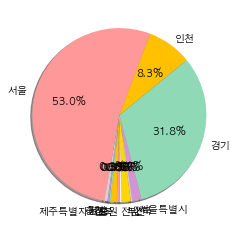

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [161]:

#colors = ['silver', 'gold', 'whitesmoke', 'lightgray']

keys=list(keys)
values=list(values)


colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','gold','whitesmoke']
explode = [0.05, 0.05, 0.05, 0.05]
plt.rcParams['font.family'] = 'AppleGothic'


#plt.pie(values, labels=keys, autopct='%1.f%%')
plt.pie(values, labels=keys, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)
plt.figure(figsize=(50000,50000))
plt.show()

In [146]:
# 서울, 인천, 경기가 높으므로 제대로 보여주고, 나머지 지역들은 기타로 처리

In [166]:
print(sum(values))
349-(118+29+111)
#'서울특별시', '전북', '부산', '전남', '강원', '경북', '제주특별자치도', '경남', '충천

349
[118, 29, 111, 91]


In [167]:
keys=['서울','인천','경기','기타(서울특별시, 전북, 전남, 경북, 경남, 부산, 춘천, 제주도 )']
values=[118,29,111,91]

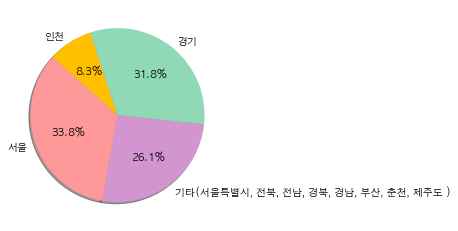

In [169]:
colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','gold','whitesmoke']
explode = [0.05, 0.05, 0.05, 0.05]
plt.rcParams['font.family'] = 'AppleGothic'


#plt.pie(values, labels=keys, autopct='%1.f%%')
plt.pie(values, labels=keys, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)
plt.show()